# Výsledné vnitřní účinky zakřiveného prutu

Vypracoval: Filip Horák, 2017/2018

U prutu dle obrázku určete průběh VVÚ.

## Řešení

Ze začátku je nutné naimportovat potřebné knihovny.

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

Vyvoláme obrázek úlohy.

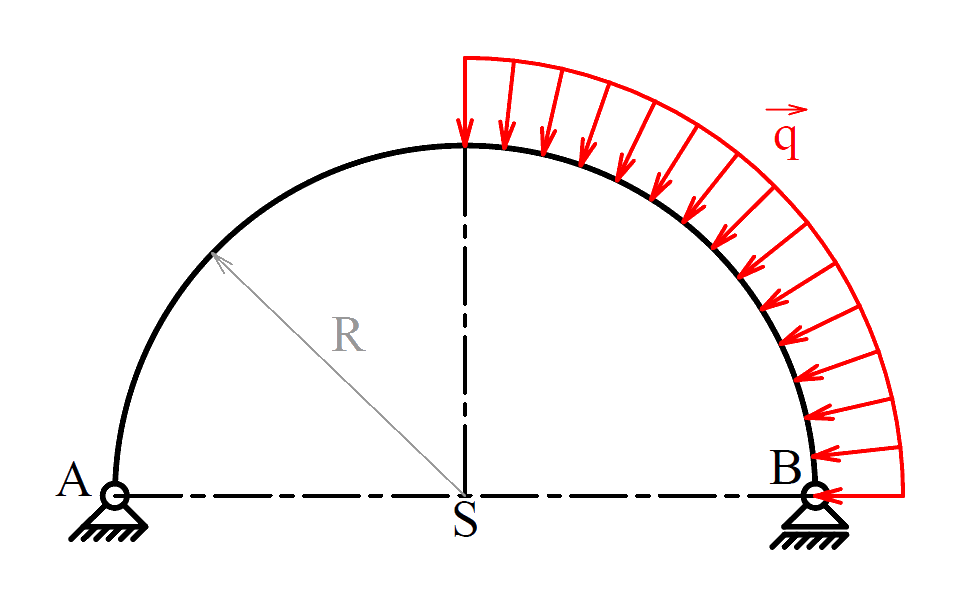

In [2]:
Image(filename='01-vvu-zakriveny-prut-1.png', width=400)

Zavedeme potřebné proměnné jako symboly.

In [3]:
C1,C2,C3=sp.symbols('C1 C2 C3')
N1,T1,M1=sp.symbols('N1 T1 M1')
N2,T2,M2=sp.symbols('N2 T2 M2')
fi1,fi2,fii=sp.symbols('varphi_1 varphi_2 varphi_i')
fi,R=sp.symbols('varphi R')
FAx,FAz,FB,q=sp.symbols('FAx FAz FB q')

Prut uvolníme a následně sestavíme statické rovnice rovnováhy pro určení reakcí ve vazbách.

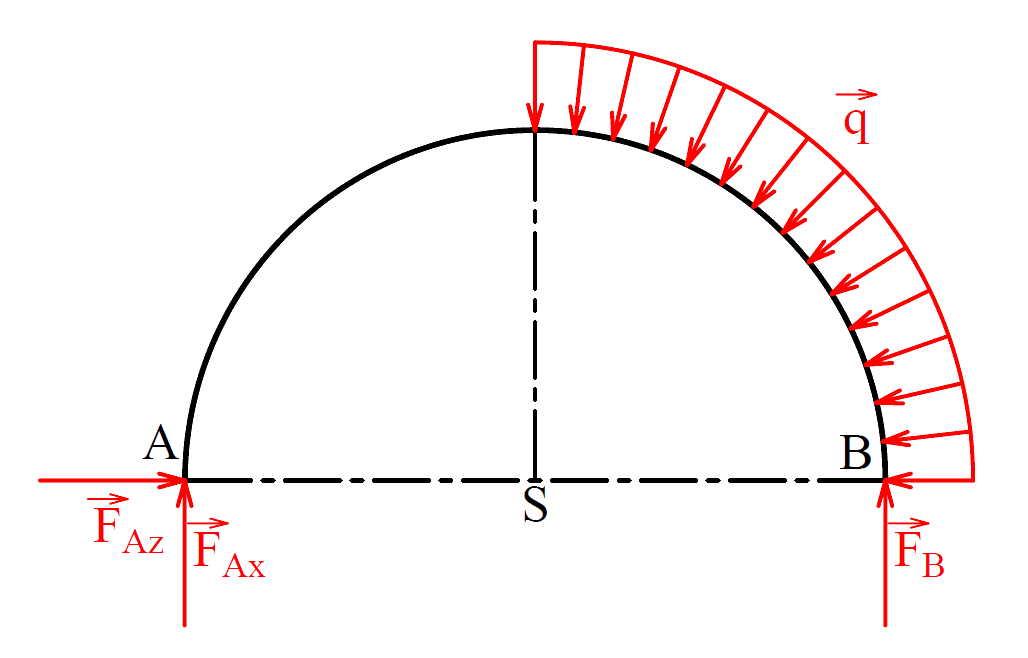

In [4]:
Image(filename='01-vvu-zakriveny-prut-2.png', width=400)

$$\begin{align}
\sum_{}^{} F_{z}: & \, F_{Az} - \int_{0}^{\varphi} qRcos\varphi' \mathrm{d}\varphi'= 0 \\
\sum_{}^{} F_{x}: & \, F_{Ax} + F_{B} - \int_{0}^{\varphi} qRsin\varphi' \mathrm{d}\varphi' = 0 \\
\sum_{}^{} M_{S}: & \, RF_{Ax} - RF_{B} = 0
\end{align}$$

In [5]:
eq1=FAz-sp.integrate((q*R*sp.cos(fii)),[fii,0,sp.pi/2])
eq2=FAx+FB-sp.integrate((q*R*sp.sin(fii)),[fii,0,sp.pi/2])
eq3=R*FAx-R*FB
eq1,eq2,eq3

Vyjádříme jednotlivé síly ve vazbách.

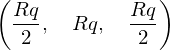

In [6]:
sol=sp.linsolve([eq1,eq2,eq3],[FAx,FAz,FB])
FAx,FAz,FB=next(iter(sol))
FAx,FAz,FB

**Úsek 1**

Uvolňujeme zleva s délkou úseku:
$$\varphi_{1} \in \big \langle 0 ;\frac{\pi}{2}\big \rangle$$

Sestavíme rovnice VVÚ.

$$N_{1} + F_{Ax}cos\varphi_{1} + F_{Az}sin\varphi_{1}= 0$$
$$T_{z1} -F_{Ax}sin\varphi_{1} + F_{Az}cos\varphi_{1}= 0$$
$$M_{oy1} -F_{Ax}(R - Rcos\varphi_{1}) + F_{Az}Rsin\varphi_{1}= 0$$

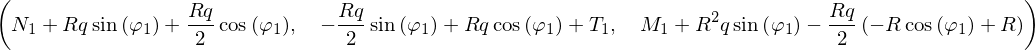

In [7]:
eq1=N1+FAx*sp.cos(fi1)+FAz*sp.sin(fi1)
eq2=T1-FAx*sp.sin(fi1)+FAz*sp.cos(fi1)
eq3=M1-FAx*(R-R*sp.cos(fi1))+FAz*R*sp.sin(fi1)
eq1,eq2,eq3

Vyjádříme ze soustavy rovnic jednotlivé složky VVÚ.

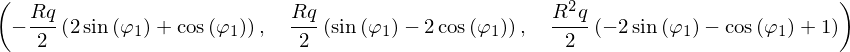

In [8]:
sol=sp.linsolve((eq1,eq2,eq3),(N1,T1,M1))
N1_sol,T1_sol,M1_sol=next(iter(sol))
N1_sol,T1_sol,M1_sol

**Úsek 2**

Pokračujeme v uvolňování zleva s délkou úseku:
$$\varphi_{2} \in \big \langle 0 ;\frac{\pi}{2}\big \rangle$$
Procházíme přes střed a můžeme využít, že $N_{2} = T_{1}$ a $T_{2} = -N_{1}$, nesmíme ale zapomenout přidat do rovnic liniové zatížení pomocí integrálů.

Sestavíme rovnice VVÚ.
$$N_{2} - F_{Ax}sin\varphi_{2} + F_{Az}cos\varphi_{2} + \int_{0}^{\varphi_{2}} qRsin\varphi' \mathrm{d}\varphi'= 0$$
$$T_{z2} - F_{Ax}cos\varphi_{2} - F_{Az}sin\varphi_{2} + \int_{0}^{\varphi_{2}} qRcos\varphi' \mathrm{d}\varphi'= 0$$
$$M_{oy2} -F_{Ax}(R + Rcos\varphi_{2}) + F_{Az}Rsin\varphi_{2} + \int_{0}^{\varphi_{2}} qR^2sin\varphi' \mathrm{d}\varphi'= 0$$

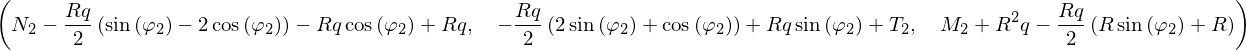

In [9]:
eq1=N2-T1_sol.subs(fi1,fi2)+sp.integrate((q*R*sp.sin(fii)),[fii,0,fi2])
eq2=T2+N1_sol.subs(fi1,fi2)+sp.integrate((q*R*sp.cos(fii)),[fii,0,fi2])
eq3=M2-FAx*(R+R*sp.sin(fi2))+FAz*R*sp.cos(fi2)+sp.integrate((q*R**2*sp.sin(fii)),[fii,0,fi2])
eq1,eq2,eq3

Vyjádříme ze soustavy rovnic jednotlivé složky VVÚ.

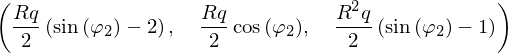

In [10]:
sol=sp.linsolve((eq1,eq2,eq3),(N2,T2,M2))
N2_sol,T2_sol,M2_sol=next(iter(sol))
N2_sol,T2_sol,M2_sol

Zavedeme číselné hodnoty veličin.
$$\begin{align}
R & = 1\, \mathrm{m} \\
q & = 2000\, \mathrm{N\cdot m^{-1}}
\end{align}$$

In [11]:
R_=1.
q_=2000.

**Grafy úseku 1**

Nejprve zavedeme střednici, souřadnicové osy grafu a spočteme souřadnice jednotlivých VVÚ.

In [12]:
bodu=20
meritko=7.
thetaI=np.linspace(0,np.pi/2,bodu)

strednice_x=[-np.cos(ii) for ii in thetaI]
strednice_y=[np.sin(ii) for ii in thetaI]

grid_x=[[0,0],[0,-(1+1/(meritko-1))*np.cos(np.pi/4.)],[0,(-1-1/(meritko-1))]]
grid_y=[[0,(1+1/(meritko-1))],[0,(1+1/(meritko-1))*np.sin(np.pi/4.)],[0,0]]

N1_plot=[float(N1_sol.subs({q:q_,R:R_,fi1:ii})) for ii in thetaI]
N1_plot_max=max(np.absolute(N1_plot))
N1_plot_x=[(N1_plot[ii]/meritko/N1_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
N1_plot_y=[(N1_plot[ii]/meritko/N1_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

T1_plot=[float(T1_sol.subs({q:q_,R:R_,fi1:ii})) for ii in thetaI]
T1_plot_max=max(np.absolute(T1_plot))
T1_plot_x=[(T1_plot[ii]/meritko/T1_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
T1_plot_y=[(T1_plot[ii]/meritko/T1_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

M1_plot=[float(M1_sol.subs({q:q_,R:R_,fi1:ii})) for ii in thetaI]
M1_plot_max=max(np.absolute(M1_plot))
M1_plot_x=[(M1_plot[ii]/meritko/M1_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
M1_plot_y=[(M1_plot[ii]/meritko/M1_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

Vykreslení grafů:

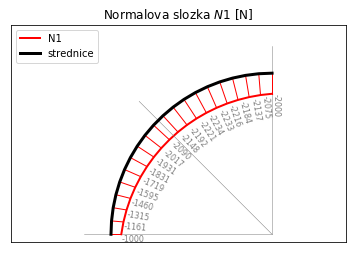

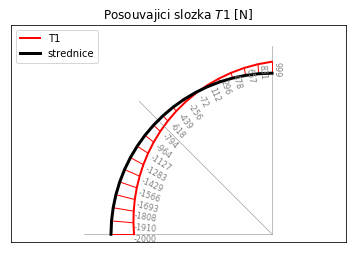

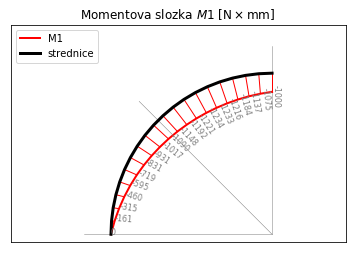

In [13]:
#N1
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',      
    top='off',       
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Normalova slozka $N1$ '+r'$[\mathrm{N}]$')
ax.plot(N1_plot_x,N1_plot_y,color="red",label='N1',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],N1_plot_x[ii]]
  pointy=[strednice_y[ii],N1_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(N1_plot[ii])), \
          horizontalalignment="left",verticalalignment="top",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper left')

#T1
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',     
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Posouvajici slozka $T1$ '+r"[$\mathrm{N}$]")
ax.plot(T1_plot_x,T1_plot_y,color="red",label='T1',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],T1_plot_x[ii]]
  pointy=[strednice_y[ii],T1_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(T1_plot[ii])), \
          horizontalalignment="left",verticalalignment="top",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper left')

#Mo1
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',     
    top='off',        
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Momentova slozka $M1$ '+r'$[\mathrm{N}\times\mathrm{mm}]$')
ax.plot(M1_plot_x,M1_plot_y,color="red",label='M1',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],M1_plot_x[ii]]
  pointy=[strednice_y[ii],M1_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(M1_plot[ii])), \
          horizontalalignment="left",fontsize=8,color="grey", \
          rotation=(-180.*thetaI[ii]/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper left')

**Grafy úseku 2**

Nejprve zavedeme střednici, souřadnicové osy grafu a spočteme souřadnice jednotlivých VVÚ.

In [14]:
#Grafy úseku 2
strednice_y=[np.cos(ii) for ii in thetaI]
strednice_x=[np.sin(ii) for ii in thetaI]

grid_x=[[0,0],[0,(1+1/(meritko-1))*np.cos(np.pi/4.)],[0,(1+1/(meritko-1))]]
grid_y=[[0,(1+1/(meritko-1))],[0,(1+1/(meritko-1))*np.sin(np.pi/4.)],[0,0]]

N2_plot=[float(N2_sol.subs({q:q_,R:R_,fi2:ii})) for ii in thetaI]
N2_plot_max=max(np.absolute(N2_plot))
N2_plot_x=[(N2_plot[ii]/meritko/N2_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
N2_plot_y=[(N2_plot[ii]/meritko/N2_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

T2_plot=[float(T2_sol.subs({q:q_,R:R_,fi2:ii})) for ii in thetaI]
T2_plot_max=max(np.absolute(T2_plot))
T2_plot_x=[(T2_plot[ii]/meritko/T2_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
T2_plot_y=[(T2_plot[ii]/meritko/T2_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

M2_plot=[float(M2_sol.subs({q:q_,R:R_,fi2:ii})) for ii in thetaI]
M2_plot_max=max(np.absolute(M2_plot))
M2_plot_x=[(M2_plot[ii]/meritko/M2_plot_max+1)*strednice_x[ii] for ii in range(bodu)]
M2_plot_y=[(M2_plot[ii]/meritko/M2_plot_max+1)*strednice_y[ii] for ii in range(bodu)]

Vykreslení grafů:

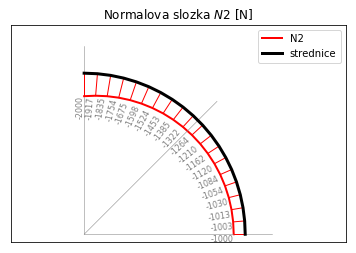

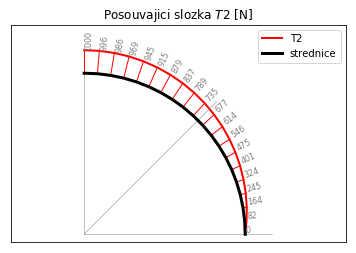

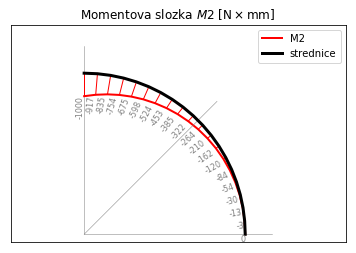

In [15]:
#N2
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Normalova slozka $N2$ '+r'$[\mathrm{N}]$')
ax.plot(N2_plot_x,N2_plot_y,color="red",label='N2',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],N2_plot_x[ii]]
  pointy=[strednice_y[ii],N2_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(N2_plot[ii])), \
          horizontalalignment="right",verticalalignment="top",fontsize=8,color="grey", \
          rotation=(180.*(np.pi/2-thetaI[ii])/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper right')

#T2
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',     
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Posouvajici slozka $T2$ '+r"[$\mathrm{N}$]")
ax.plot(T2_plot_x,T2_plot_y,color="red",label='T2',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],T2_plot_x[ii]]
  pointy=[strednice_y[ii],T2_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(T2_plot[ii])), \
          horizontalalignment="left",verticalalignment="bottom",fontsize=8,color="grey", \
          rotation=(180.*(np.pi/2-thetaI[ii])/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper right')

#Mo2
fig,ax=plt.subplots()
ax.axis("equal")
ax.tick_params(
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') 
ax.set_ylim(-0.05,1.3)
ax.set_title('Momentova slozka $M2$ '+r'$[\mathrm{N}\times\mathrm{mm}]$')
ax.plot(M2_plot_x,M2_plot_y,color="red",label='M2',lw=2)
for ii in grid_x:
  ax.plot(ii,grid_y[grid_x.index(ii)],color="grey",lw=0.5)
for ii in range(bodu):
  pointx=[strednice_x[ii],M2_plot_x[ii]]
  pointy=[strednice_y[ii],M2_plot_y[ii]]
  ax.plot(pointx,pointy,color="red",lw=1)
  ax.text(pointx[1],pointy[1],str(int(M2_plot[ii])), \
          horizontalalignment="right",verticalalignment="top",fontsize=8,color="grey", \
          rotation=(180.*(np.pi/2-thetaI[ii])/np.pi))
ax.plot(strednice_x,strednice_y,color="black",label="strednice",lw=3)
ax.legend(loc='upper right')